In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
from matplotlib import cm
import matplotlib as mpl
import torch.nn.init as init



class rnnei (nn.Module):

    def __init__ (self, A, INS, RS, OS):

        super(rnnei ,self).__init__()
        self.INS = INS
        self.RS = RS
        self.OS = OS
        self.IN = nn.Linear(self.INS, self.RS)
        self.HID = nn.Linear(self.RS, self.RS)
        self.OUT = nn.Linear(self.RS, self.OS)
        self.r = torch.zeros(1, self.RS)
        self.A = A

        self.A = torch.diag(self.A)

    def choise (self):
        
        k=self.HID.weight.data
        self.PLUS = torch.abs(k)
        p=torch.mm(self.PLUS ,self.A)
        NEW = nn.Parameter((p + k ) /2)
        self.HID.weight = NEW

        return

    def reset (self):
        self.r = torch.zeros(1, self.RS)
        return

    def forward (self, u):
        self.x = self.HID(self.r) + self.IN(u)
        self.r = torch.relu(self.x)
        self.z = self.OUT(self.r)
        return self.z



def train (X ,Y ,epoch ,rate ,NET):
    
    
    X=X.float()
    Y=Y.float()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(NET.parameters(),rate)
    optimizer.zero_grad()
    loss_monit=np.zeros(epoch)
    NET.reset()
    NET.choise()


    for i in range(epoch):

        y = NET.forward(X)
        loss = criterion(y,Y)
        loss_monit[i] = loss
        loss.backward()
        optimizer.step()
        NET.reset()
        NET.choise()



    plt.plot(loss_monit)
    plt.title('Loss with rate : '+str(rate))
    plt.show()















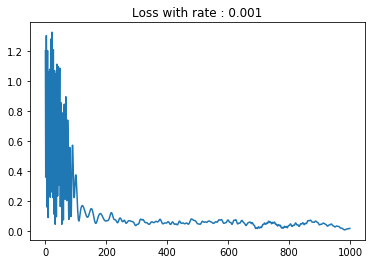

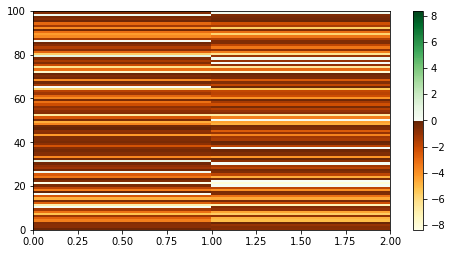

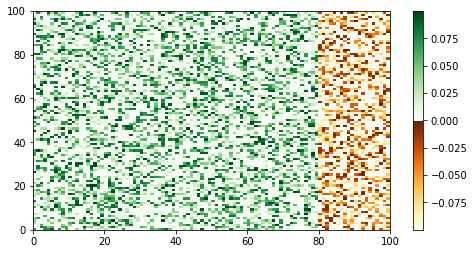

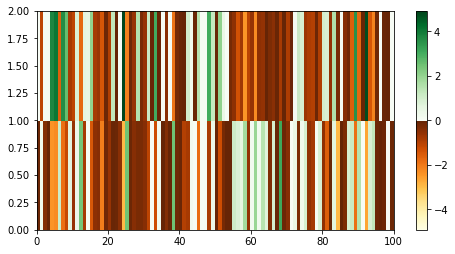

In [21]:
 
def dataset_1(n,N,Nz):
    
    y = 5 + 5*np.random.rand(2,n)
    input1 = np.array([])
    input2 = np.array([])
    output1 = np.array([])
    output2 = np.array([])

    for k in range (n):
        input1 = np.concatenate((input1, np.zeros(Nz), y[0, k]*np.ones(N)), axis=None)
        input2 = np.concatenate((input2, np.zeros(Nz), y[1, k]*np.ones(N)), axis=None)
    
        if y[0, k] > y[1, k] :
            
            s = 1
        else :
            s = 0
    
        output1 = np.concatenate((output1, np.zeros(Nz), s*np.ones(N)), axis=None)
        output2 = np.concatenate((output2, np.zeros(Nz), (1-s)*np.ones(N)), axis=None)
    

    input_np = np.transpose(np.array([input1, input2]))
    output_np = np.transpose(np.array([output1, output2]))
    input_tensor = (torch.from_numpy(input_np))
    output_tensor = (torch.from_numpy(output_np))
    
    
    return input_tensor,output_tensor


def ds(x1,x2):
    
    a=int(x1*x2)
    
    b=int((1-x1)*x2)


    X = torch.ones(x1)
    I = (-1)*torch.ones(x2)
    O = torch.cat((X ,I ))
    
    return O




q=ds(80,20)
x,y=dataset_1(20,20,5)
net = rnnei(q, 2, 100, 2)
train(x,y, 1000, 0.001, net)


#self.w1.detach().numpy()

a=net.IN.weight.data
b=a.numpy()
mapped_neuron = b
fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(bottom=0.5)
top = cm.get_cmap('YlOrBr', 128)
bottom = cm.get_cmap('Greens', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
cmap = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')  
h = np.max(np.abs(mapped_neuron))
psm = ax.pcolormesh(mapped_neuron, cmap=cmap, rasterized=True, vmin=-h, vmax=h)
fig.colorbar(psm, ax=ax)
plt.show()



a=net.HID.weight.data
b=a.numpy()        
mapped_neuron = b
fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(bottom=0.5)
top = cm.get_cmap('YlOrBr', 128)
bottom = cm.get_cmap('Greens', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
cmap = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
h = np.max(np.abs(mapped_neuron))
psm = ax.pcolormesh(mapped_neuron, cmap=cmap, rasterized=True, vmin=-h, vmax=h)
fig.colorbar(psm, ax=ax)
plt.show()



a=net.OUT.weight.data
b=a.numpy()
mapped_neuron = b
fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(bottom=0.5)
top = cm.get_cmap('YlOrBr', 128)
bottom = cm.get_cmap('Greens', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
cmap = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
h = np.max(np.abs(mapped_neuron))
psm = ax.pcolormesh(mapped_neuron, cmap=cmap, rasterized=True, vmin=-h, vmax=h)
fig.colorbar(psm, ax=ax)
plt.show()

#thanks to MR.Nejat for plotting weights




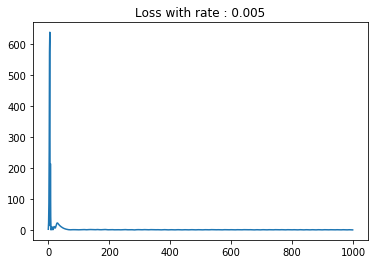

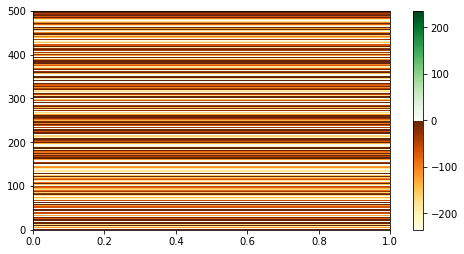

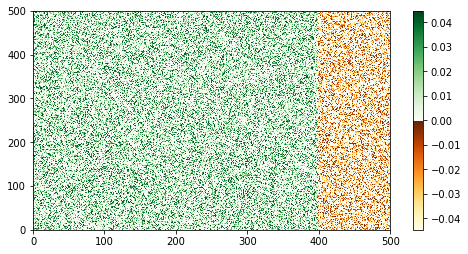

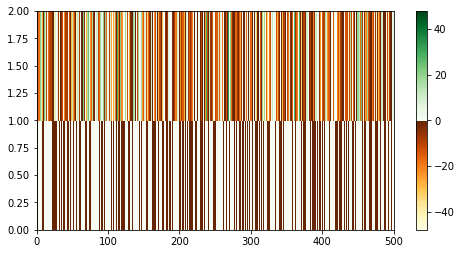

In [24]:
def ds(x1,x2):
    
    a=int(x1*x2)
    
    b=int((1-x1)*x2)


    X = torch.ones(x1)
    I = (-1)*torch.ones(x2)
    O = torch.cat((X ,I ))
    
    return O


def dataset_2(n,N):

    p1 = 5 + 5*np.random.rand(N)
    ar = 2*np.random.randint(0,2,N) - 1
    Ad = 2 + 2*np.random.rand(N)
    p2 = p1 + ar*Ad # to making sufficient distence

    inp = np.array([])
    out1 = np.array([])
    out2 = np.array([])

    for k in range (N):
        
        inp = np.concatenate((inp, np.zeros(5*n)))
        inp = np.concatenate((inp, p1[k]*np.ones(5*n)))
        inp = np.concatenate((inp, np.zeros(30*n)))
        inp = np.concatenate((inp, p2[k]*np.ones(5*n)))
        inp = np.concatenate((inp, np.zeros(30*n)))
    
        out1 = np.concatenate((out1, np.zeros(50*n)))
        out2 = np.concatenate((out2, np.zeros(50*n)))
    
        if p1[k] > p2[k]:
            s = 1
        else :
            s = 0
        
        out1 = np.concatenate((out1, s*np.ones(10*n)))
        out2 = np.concatenate((out2, (1-s)*np.ones(10*n)))
        out1 = np.concatenate((out1, np.zeros(15*n)))
        out2 = np.concatenate((out2, np.zeros(15*n)))
    


    out1 = 2*out1
    out2 = 2*out2



    inp_n = np.array([inp])
    out = np.array([out1, out2])
    inp_torch = (torch.from_numpy(np.transpose(inp_n))).float()
    out_torch = (torch.from_numpy(np.transpose(out))).float()

    return inp_torch,out_torch




q2=ds(400,100)
x,y=dataset_2(15,10)
net2 = rnnei(q2, 1, 500, 2)
train(inp_torch,out_torch,1000,0.005,net2)



a=net2.IN.weight.data
b=a.numpy()        
mapped_neuron = b
fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(bottom=0.5)
top = cm.get_cmap('YlOrBr', 128)
bottom = cm.get_cmap('Greens', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
cmap = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
h = np.max(np.abs(mapped_neuron))
psm = ax.pcolormesh(mapped_neuron, cmap=cmap, rasterized=True, vmin=-h, vmax=h)
fig.colorbar(psm, ax=ax)
plt.show()



a=net2.HID.weight.data
b=a.numpy()
mapped_neuron = b
fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(bottom=0.5)
top = cm.get_cmap('YlOrBr', 128)
bottom = cm.get_cmap('Greens', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
cmap = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
h = np.max(np.abs(mapped_neuron))
psm = ax.pcolormesh(mapped_neuron, cmap=cmap, rasterized=True, vmin=-h, vmax=h)
fig.colorbar(psm, ax=ax)
plt.show()




a=net2.OUT.weight.data
b=a.numpy()
mapped_neuron = b
fig, ax = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(bottom=0.5)
top = cm.get_cmap('YlOrBr', 128)
bottom = cm.get_cmap('Greens', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
cmap = mpl.colors.ListedColormap(newcolors, name='OrangeBlue')
h = np.max(np.abs(mapped_neuron))
psm = ax.pcolormesh(mapped_neuron, cmap=cmap, rasterized=True, vmin=-h, vmax=h)
fig.colorbar(psm, ax=ax)
plt.show()
